The numbers of hours a student studies and the percentage of marks that student scores in an exam. We want to find out that given the number of hours a student prepares for a test, about how high of a score can the student achieve?

In [6]:
#Importing Libraries

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [9]:
#import the CSV dataset using pandas
#dataset collect from 'stack abuse' site.helpful link: https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
dataset = pd.read_csv('student_scores.csv') 

In [10]:
#find row and column on dataset
print(dataset.shape) 

(25, 2)


This means that our dataset has 25 rows and 2 columns.

In [18]:
dataset.head(n=6)  #This function returns the first n rows for the object based on position.default n value is 5.

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


To see statistical details of the dataset, we can use describe():

In [20]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. 

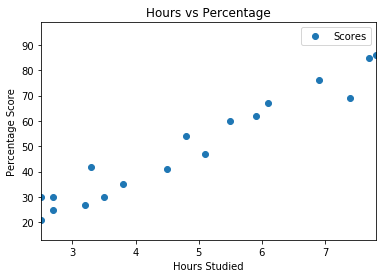

In [26]:
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show() 

To use plot() function of the pandas dataframe and pass it the column names for x coordinate and y coordinate, which are "Hours" and "Scores" respectively.

Preparing the Data:
     Attributes are the independent variables while labels are dependent variables whose values are to be predicted.Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column. 

In [27]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

In [29]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

Training the Algorithm:
    We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [32]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Linear Regression Model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slop calculated by the linear regression algorithm for our dataset, 

In [33]:
print(regressor.intercept_)  

2.018160041434662


In [34]:
#For retrieving the slope (coefficient of x)
print(regressor.coef_)  

[9.91065648]


This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

Making Predictions:
    Now that we have trained our algorithm, it's time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make pre-dictions on the test data, 

In [35]:
y_pred = regressor.predict(X_test)  

The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.

To compare the actual output values for X_test with the predicted values, execute the following script:

In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 
#train_test_split function randomly splits data into train and test sets

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Evaluating the Algorithm:
    The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:
1.Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
2.Mean Squared Error (MSE) is the mean of the squared errors.
3.Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [42]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
